Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time (Swanson and Fujimoto, 2017).

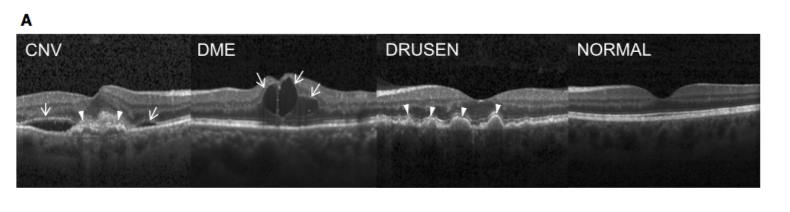


Figure 2. Representative Optical Coherence Tomography Images and the Workflow Diagram [Kermany et. al. 2018] http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

(A) (Far left) choroidal neovascularization (CNV) with neovascular membrane (white arrowheads) and associated subretinal fluid (arrows). (Middle left) Diabetic macular edema (DME) with retinal-thickening-associated intraretinal fluid (arrows). (Middle right) Multiple drusen (arrowheads) present in early AMD. (Far right) Normal retina with preserved foveal contour and absence of any retinal fluid/edema.

##Content
The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN).

Optical coherence tomography (OCT) images (Spectralis OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

Before training, each image went through a tiered grading system consisting of multiple layers of trained graders of increasing expertise for verification and correction of image labels. Each image imported into the database started with a label matching the most recent diagnosis of the patient. The first tier of graders consisted of undergraduate and medical students who had taken and passed an OCT interpretation course review. This first tier of graders conducted initial quality control and excluded OCT images containing severe artifacts or significant image resolution reductions. The second tier of graders consisted of four ophthalmologists who independently graded each image that had passed the first tier. The presence or absence of choroidal neovascularization (active or in the form of subretinal fibrosis), macular edema, drusen, and other pathologies visible on the OCT scan were recorded. Finally, a third tier of two senior independent retinal specialists, each with over 20 years of clinical retina experience, verified the true labels for each image. The dataset selection and stratification process is displayed in a CONSORT-style diagram in Figure 2B. To account for human error in grading, a validation subset of 993 scans was graded separately by two ophthalmologist graders, with disagreement in clinical labels arbitrated by a senior retinal specialist.

For additional information: see http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

--- 


To train this model I have used my local GPU - NVIDIA GeForce GTX 1050 Ti with Max-Q Design.

To enable gpu based training refer to this youtube video by thehardwareguy : 
[https://youtu.be/tPq6NIboLSc](https://)

Also, I used vs code as editor.

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()#to test if the gpu is detected or not

'/device:GPU:0'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers
from tensorflow.keras import Model

You can obtain the dataset the from the link provided above in the content.
I downloaded the dataset and saved it in the directory shown below which is my local directory.
You can change it according to your directory.

The following code keeps track of all the paths and ultimately extracts the individual path of all the images and stores them as lists.

In [ ]:
train_dir = r'C:\Users\msii\Desktop\Datasets\OCT2017\train'
test_dir  = r'C:\Users\msii\Desktop\Datasets\OCT2017\test'

train_CNV_dir = os.path.join(train_dir, os.listdir(train_dir)[0])
train_DME_dir = os.path.join(train_dir, os.listdir(train_dir)[1])
train_DRUSEN_dir = os.path.join(train_dir, os.listdir(train_dir)[2])
train_NORMAL_dir = os.path.join(train_dir, os.listdir(train_dir)[3])

test_CNV_dir = os.path.join(test_dir, os.listdir(test_dir)[0])
test_DME_dir = os.path.join(test_dir, os.listdir(test_dir)[1])
test_DRUSEN_dir = os.path.join(test_dir, os.listdir(test_dir)[2])
test_NORMAL_dir = os.path.join(test_dir, os.listdir(test_dir)[3])

train_CNV_names = os.listdir(train_CNV_dir)
train_DME_names = os.listdir(train_DME_dir)
train_DRUSEN_names = os.listdir(train_DRUSEN_dir)
train_NORMAL_names = os.listdir(train_NORMAL_dir)

test_CNV_names = os.listdir(test_CNV_dir)
test_DME_names = os.listdir(test_DME_dir)
test_DRUSEN_names = os.listdir(test_DRUSEN_dir)
test_NORMAL_names = os.listdir(test_NORMAL_dir)

train_CNV_images = []
train_DME_images = []
train_DRUSEN_images = []
train_NORMAL_images = []

test_CNV_images = []
test_DME_images = []
test_DRUSEN_images = []
test_NORMAL_images = []

for item in train_CNV_names:
    train_CNV_images.append(os.path.join(train_CNV_dir, item))
for item in train_DME_names:
    train_DME_images.append(os.path.join(train_DME_dir, item))
for item in train_DRUSEN_names:
    train_DRUSEN_images.append(os.path.join(train_DRUSEN_dir, item))
for item in train_NORMAL_names:
    train_NORMAL_images.append(os.path.join(train_NORMAL_dir, item))

for item in test_CNV_names:
    test_CNV_images.append(os.path.join(test_CNV_dir, item))
for item in test_DME_names:
    test_DME_images.append(os.path.join(test_DME_dir, item))
for item in test_DRUSEN_names:
    test_DRUSEN_images.append(os.path.join(test_DRUSEN_dir, item))
for item in test_NORMAL_names:
    test_NORMAL_images.append(os.path.join(test_NORMAL_dir, item))


Following code helps in visualizing the number of images present in all the classes both in training as well as testing data.

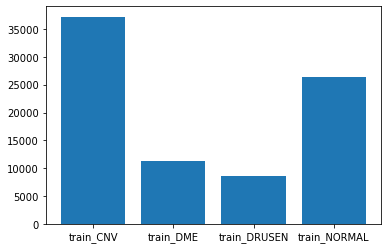

train_CNV_images 37205
train_DME_images 11348
train_DRUSEN_images 8616
train_NORMAL_images 26315 



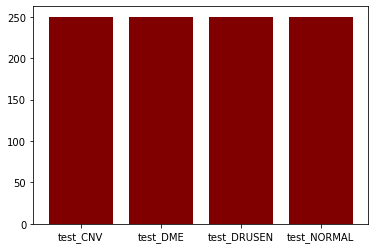

test_CNV_images 37205
test_DME_images 11348
test_DRUSEN_images 8616
test_NORMAL_images 26315


In [ ]:
x1 = ['train_CNV', 'train_DME', 'train_DRUSEN', 'train_NORMAL']
y1 = [len(train_CNV_images), len(train_DME_images), len(train_DRUSEN_images), len(train_NORMAL_images)]

x2 = ['test_CNV', 'test_DME', 'test_DRUSEN', 'test_NORMAL']
y2 = [len(test_CNV_images), len(test_DME_images), len(test_DRUSEN_images), len(test_NORMAL_images)]

plt.bar(x1, y1)
plt.show()
print('train_CNV_images', len(train_CNV_images))
print('train_DME_images', len(train_DME_images))
print('train_DRUSEN_images', len(train_DRUSEN_images))
print('train_NORMAL_images', len(train_NORMAL_images), '\n')

plt.bar(x2, y2, color = 'maroon')
plt.show()
print('test_CNV_images', len(train_CNV_images))
print('test_DME_images', len(train_DME_images))
print('test_DRUSEN_images', len(train_DRUSEN_images))
print('test_NORMAL_images', len(train_NORMAL_images))


Clearly, the training data is highly imbalanced which is common challenge faced while working with medical dataset.
Fortunately, there are some strategies which can help get rid of this problem. Some of these strategies are - weighted loss, upsampling and downsampling.
We shall use weighted loss strategy to tackle this problem.

Let us first have a look at some of the images from the training directory.
For each class, the first four images are displayed column-wise with their respective file names.

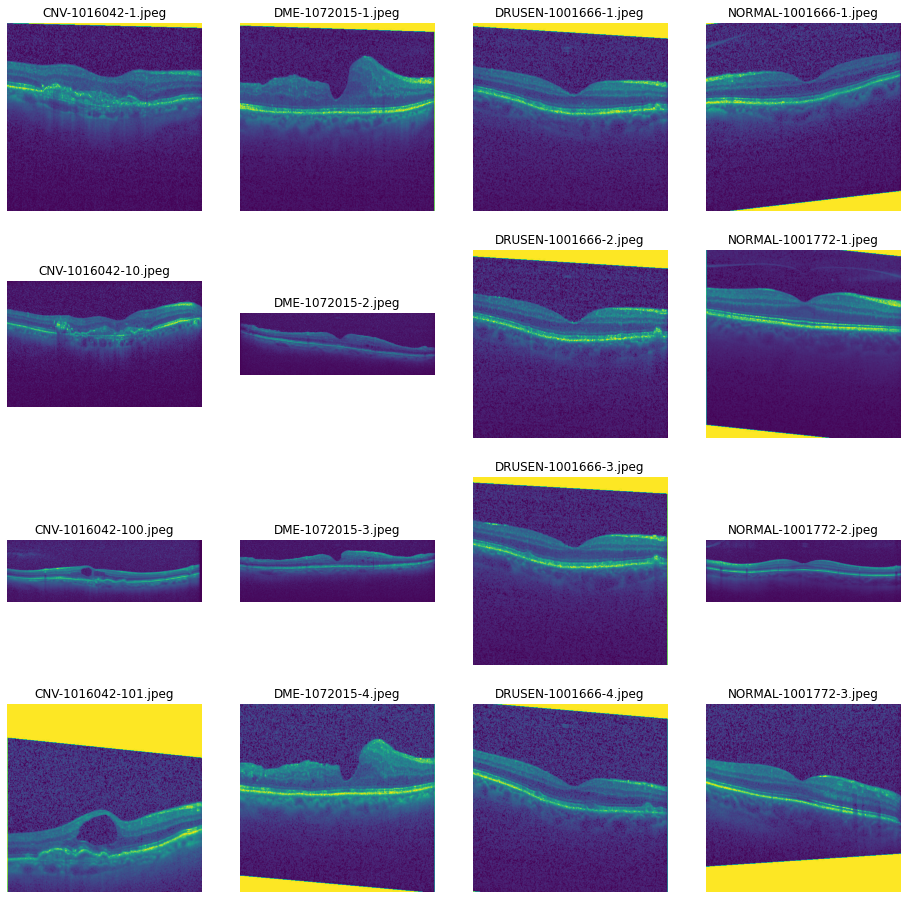

In [ ]:
print_images = []
for i in range(4):
    print_images.append(train_CNV_images[i])
    print_images.append(train_DME_images[i])
    print_images.append(train_DRUSEN_images[i])  
    print_images.append(train_NORMAL_images[i])

        #print((print_images))
for i in range(16):
    fig = plt.gcf()
    fig.set_size_inches(16, 16)    
    img = mpimg.imread(print_images[i])
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(print_images[i].split('\\')[-1])
    plt.axis('off')

The dataset already contains some augmented images - some rotated while some are skewed. Hence we'll just rescale the images and move ahead to create our model.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.0)
train_generator = train_datagen.flow_from_directory(train_dir,
                                      target_size = (150, 150),
                                      class_mode = 'categorical',
                                      batch_size = 128)

test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                     target_size = (150, 150),
                                     class_mode = 'categorical',
                                     batch_size = 32)

Found 83484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


We shall use a pretrained DenseNet121 model with imagenet wights using transfer learning.

DenseNet(Densely Connected Convolutional Networks) is one of the latest neural networks for visual object recognition. It’s quite similar to ResNet but has some fundamental differences.
In contrast to the ResNet, DenseNet paper proposes concatenating outputs from the previous layers instead of using the summation.
A clear representation of the used architecture is given below:
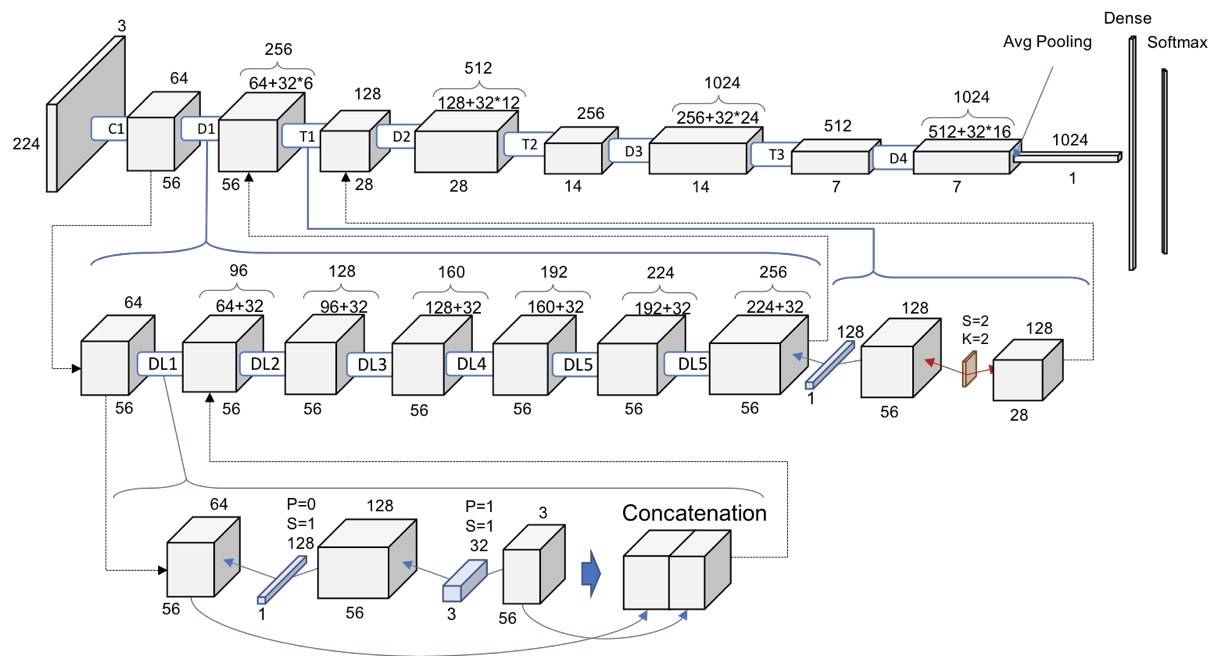

In [ ]:
pretrained_model = DenseNet121(include_top = False,
                               weights = 'imagenet',
                               input_shape = (150, 150, 3))
pretrained_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
last_layer = pretrained_model.get_layer('conv3_block12_2_conv')
print(last_layer.output_shape)

last_output = last_layer.output

(None, 19, 19, 32)


In [ ]:
x = layers.Flatten(input_shape = (150, 150, 3))(last_output)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(4, activation = 'softmax')(x)

model = Model(pretrained_model.input, x)
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

The imbalanced data produces some undesirable results. To tackle the problem we shall use weighted loss strategy. To do that we will use the following class_weights.

In [ ]:
total = len(train_CNV_images)+len(train_DME_images)+len(train_DRUSEN_images)+len(train_NORMAL_images)
class_weights = {0 : (1 - len(train_CNV_images)/total),
                 1 : (1 - len(train_DME_images)/total),
                 2 : (1 - len(train_DRUSEN_images)/total),
                 3 : (1 - len(train_NORMAL_images)/total)}
#0.5543457428968425
#0.8640697618705381
#0.8967945953715682
#0.6847898998610512


Because the dataset used is 5GB in size, it would been really difficult to upload it to the colab environment. For this reason, I used my local GPU which is relatively slow compared to the GPU provided by colab environment. Since it may take a lot of time to train such a big dataset, I chose to train the model for just 8 epochs.

In [ ]:
history = model.fit(train_generator,
                    epochs = 8,
                    validation_data = (test_generator),
                    validation_steps = 8,
                    class_weight = class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 653 steps, validate for 8 steps
Epoch 1/8
653/653 [==============================] - 378s 578ms/step - loss: 0.4497 - accuracy: 0.7726 - val_loss: 0.4416 - val_accuracy: 0.7891
Epoch 2/8
653/653 [==============================] - 357s 547ms/step - loss: 0.3143 - accuracy: 0.8442 - val_loss: 0.3803 - val_accuracy: 0.8086
Epoch 3/8
653/653 [==============================] - 355s 544ms/step - loss: 0.2555 - accuracy: 0.8747 - val_loss: 0.3864 - val_accuracy: 0.8125
Epoch 4/8
653/653 [==============================] - 357s 547ms/step - loss: 0.2077 - accuracy: 0.8973 - val_loss: 0.2943 - val_accuracy: 0.8672
Epoch 5/8
653/653 [==============================] - 352s 539ms/step - loss: 0.1682 - accuracy: 0.9189 - val_loss: 0.2772 - val_accuracy: 0.8633
Epoch 6/8
653/653 [==============================] - 338s 518ms/step - loss: 0.1355 - accuracy: 0.9345 - val_loss: 0.2601 - val_accuracy: 0.8867
Epoch 7/8
653/653 [===================

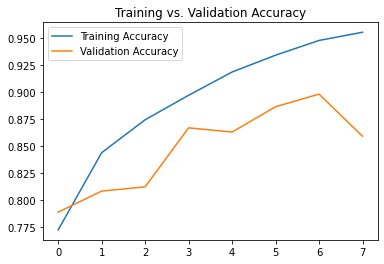

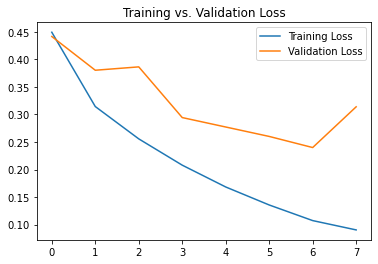

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

With just 8 epochs, the trained model seems to have performed really good with an approximate validation accuracy ~85 and the accuracy can most probably be improved if trained for a longer period of time or more epochs.